<a href="https://colab.research.google.com/github/kavyaa2015/REP-1/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-1

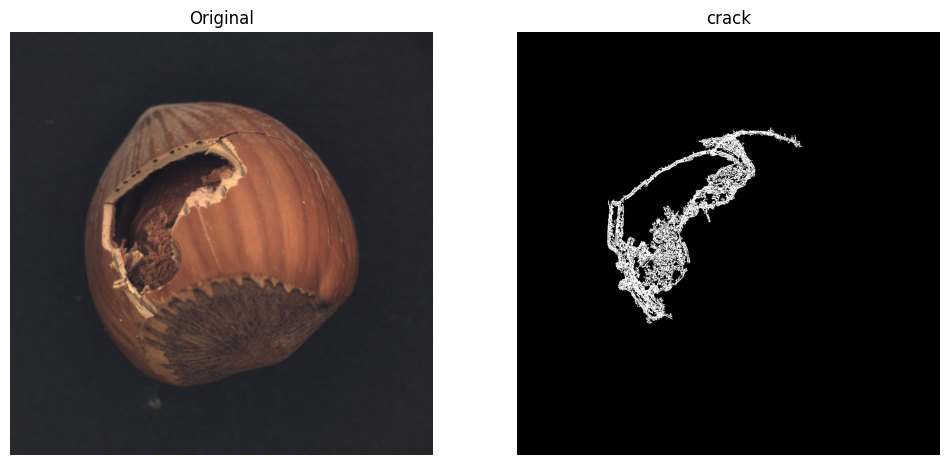

In [ ]:
 #Apply spatial filtering to enhance the surface of an automotive part image and highlight scratches or dents
import cv2
import numpy as np
import matplotlib.pyplot as plt
import google.colab.patches as gcp
image = cv2.imread('/content/hazel_1.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
denoised = cv2.GaussianBlur(gray, (3, 3), 0)
laplacian = cv2.Laplacian(denoised, cv2.CV_64F, ksize=5)
laplacian_enhanced = cv2.convertScaleAbs(laplacian)

_, laplacian_enhanced = cv2.threshold(laplacian_enhanced, 127, 255, cv2.THRESH_BINARY)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(laplacian_enhanced)
if num_labels > 1:
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
    crack_only = np.zeros_like(cleaned)
    crack_only[labels == largest_label] = 255
else:
    crack_only = cleaned

plt.figure(figsize=(12, 6))
# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# Red Channel
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(crack_only, cv2.COLOR_BGR2RGB))
plt.title('crack')
plt.axis('off')

cv2.waitKey(0)

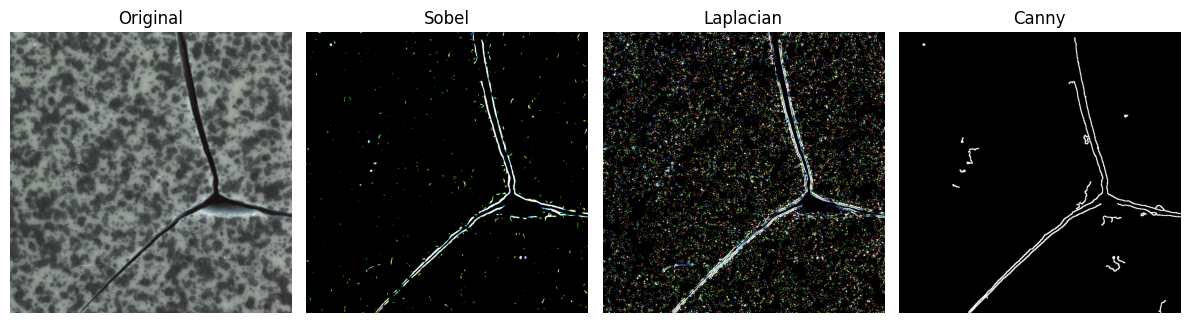

In [ ]:
#Implement Sobel, Canny, and Laplacian edge detectors on bridge/concrete images to detect cracks. Compare their effectiveness
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/title_2.png')
smoothed = cv2.GaussianBlur(image, (5, 5), 1.5)

sobel_x = cv2.Sobel(smoothed, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = cv2.convertScaleAbs(sobel)
_, sobel = cv2.threshold(sobel, 100, 255, cv2.THRESH_BINARY)

laplacian = cv2.Laplacian(smoothed, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)
laplacian_norm = cv2.normalize(laplacian_abs, None, 0, 255, cv2.NORM_MINMAX)
_, laplacian = cv2.threshold(laplacian_norm, 30, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(smoothed, 50, 200)
kernel = np.ones((3, 3), np.uint8)
canny_thick = cv2.dilate(canny, kernel, iterations=1)
canny = cv2.normalize(canny_thick, None, 0, 255, cv2.NORM_MINMAX)
_, canny= cv2.threshold(canny, 30, 255, cv2.THRESH_BINARY)

images = [image, sobel, laplacian, canny]
titles = ['Original', 'Sobel', 'Laplacian', 'Canny', 'Largest Crack']

plt.figure(figsize=(12, 6))
for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1, 4, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

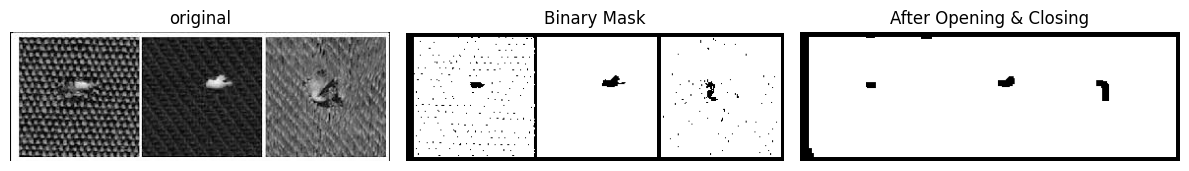

In [ ]:
# Use morphological operations (opening/closing) to isolate defective regions in a fabric image
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/fabric.jfif', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(image, 160, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

images = [image, binary, closed]
titles = ['original','Binary Mask', 'After Opening & Closing']

plt.figure(figsize=(12,6))
for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1, 3, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

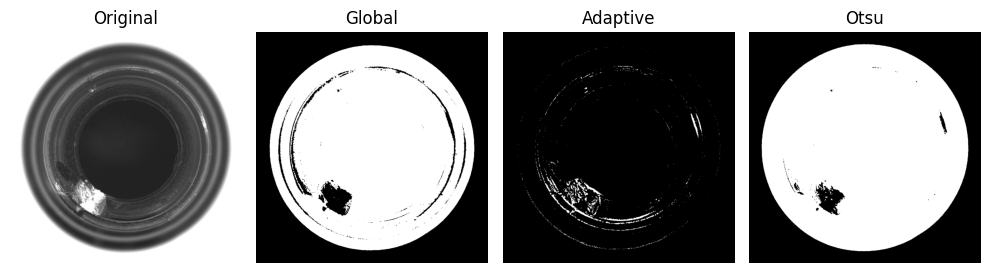

In [ ]:
#Apply global, adaptive, and Otsu thresholding on metal surface images to separate defective vs. non-defective regions. Provide comparative results
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/bottle_4.png', cv2.IMREAD_GRAYSCALE)

_, global_th = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)

adaptive_th = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,blockSize=35, C=15)

_, otsu_th = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

titles = ['Original', 'Global', 'Adaptive', 'Otsu']
images = [img, global_th, adaptive_th, otsu_th]

plt.figure(figsize=(10,5))
for i, (im, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1,4,i)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


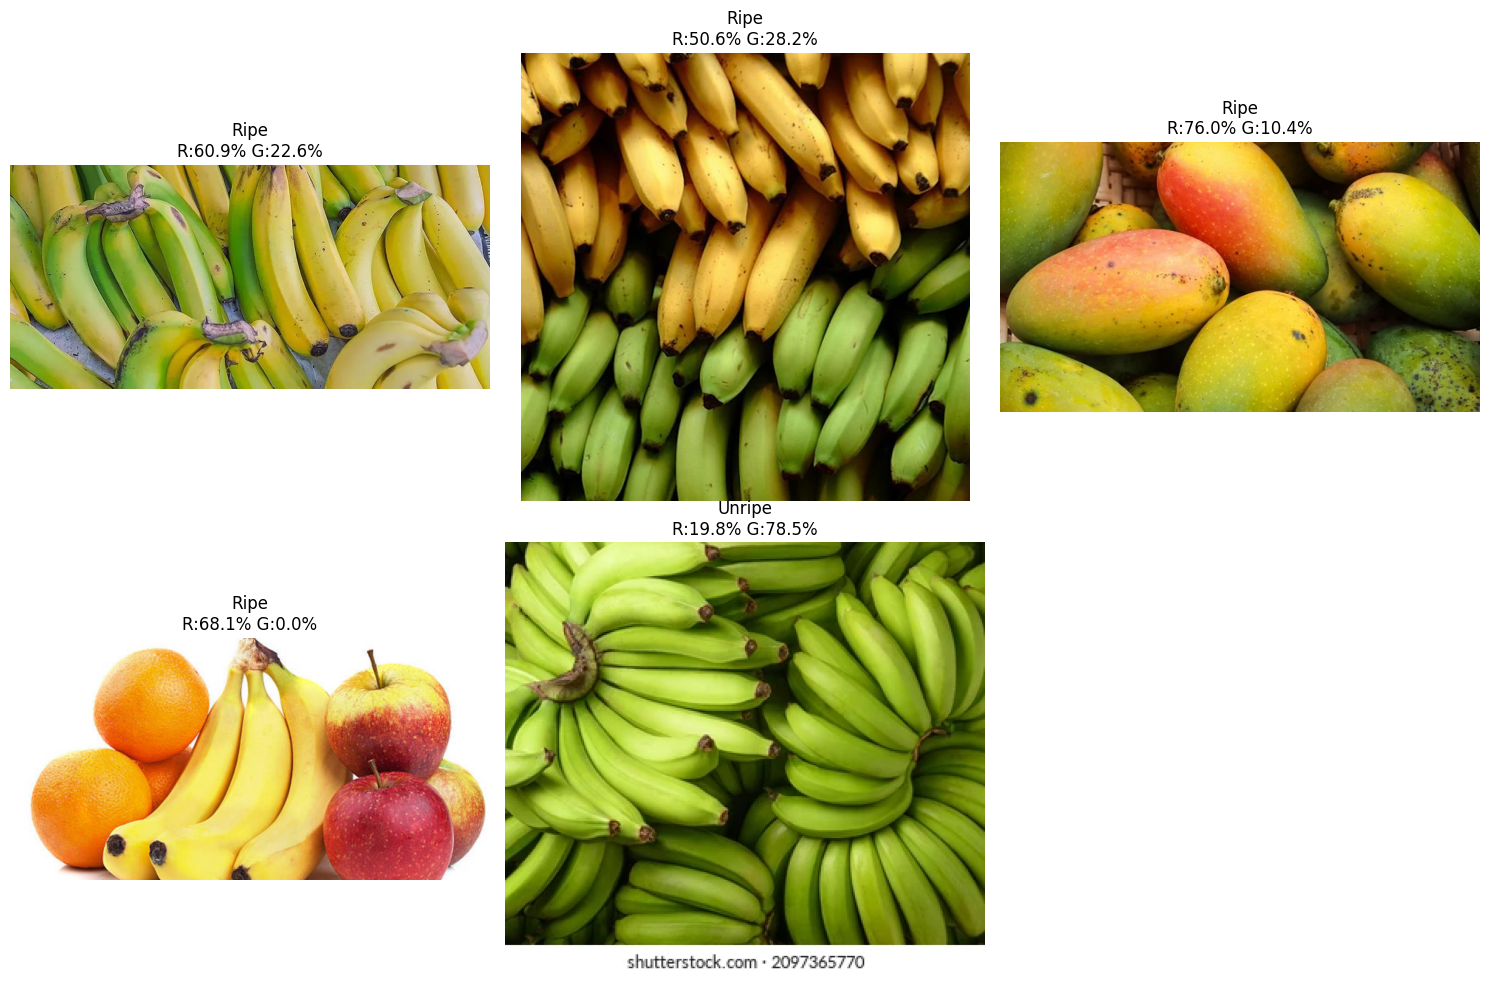

In [ ]:
# Develop a color-based thresholding method (HSV space) to classify fruits as ripe or unripe. Test on at least 5 samples
import cv2, numpy as np, matplotlib.pyplot as plt
image_files = [
    "/content/banana.webp",
    "/content/banana1.webp",
    "/content/fruits.webp",
    "/content/ripe.jpg",
    "/content/unripe.webp"
]

yellow_range = ((10,100,80), (35,255,255))
red_ranges   = [((0,120,70), (10,255,255)), ((160,120,70), (179,255,255))]
green_range  = ((35,40,40), (85,255,255))

# Determine subplot grid
num_images = len(image_files)
cols = 3  # max 3 images per row
rows = (num_images + cols - 1) // cols  # ceil division

plt.figure(figsize=(5*cols, 5*rows))

for idx, path in enumerate(image_files, 1):
    img = cv2.imread(path)
    if img is None:
        print(f"Cannot read {path}")
        continue

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask_yellow = cv2.inRange(hsv, *map(np.array, yellow_range))
    mask_red = np.zeros(hsv.shape[:2], dtype=np.uint8)
    for low, high in red_ranges:
        mask_red |= cv2.inRange(hsv, np.array(low), np.array(high))
    ripe_mask = mask_yellow | mask_red

    mask_green = cv2.inRange(hsv, *map(np.array, green_range))

    ripe_ratio  = np.count_nonzero(ripe_mask)  / ripe_mask.size * 100
    green_ratio = np.count_nonzero(mask_green) / mask_green.size * 100
    label = "Ripe" if ripe_ratio > green_ratio else "Unripe"

    plt.subplot(rows, cols, idx)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{label}\nR:{ripe_ratio:.1f}% G:{green_ratio:.1f}%")
    plt.axis('off')

plt.tight_layout()
plt.show()

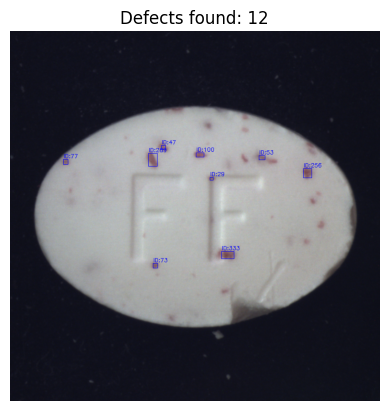

In [ ]:
#Use connected components analysis on a tablet image to detect missing, broken, or extra objects. Display bounding boxes for identified defects.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img  = cv2.imread("/content/pill.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))

num, labels, stats, _ = cv2.connectedComponentsWithStats(mask)
out = img.copy()

for x, y, w, h, a in stats[1:]:
    if 20 < a < 500:
        cv2.rectangle(out, (x,y), (x+w, y+h), (255,0,0), 1)
        cv2.putText(out, f"ID:{a}", (x,y-3),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,0,0), 1)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title(f"Defects found: {num-1}")
plt.axis('off')
plt.show()



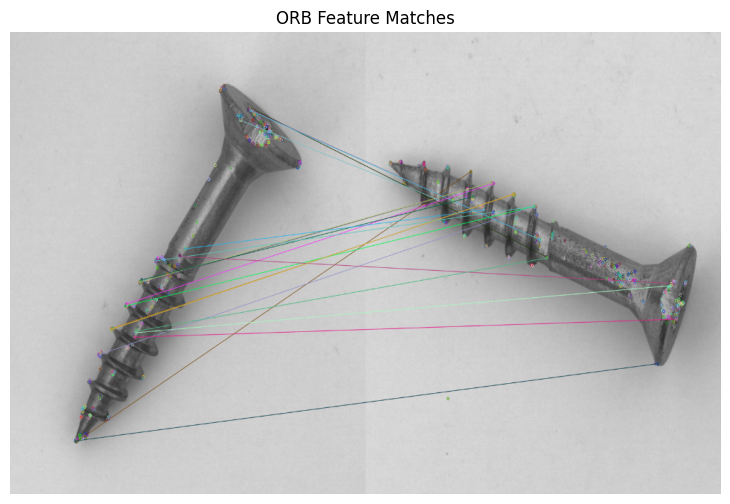

In [6]:
#Feature matching using ORB
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
q_img = cv2.imread('/content/004.png')
train_img = cv2.imread('/content/011.png')
q_img_bw = cv2.cvtColor(q_img, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
q_Keypoints, q_Descriptors = orb.detectAndCompute(q_img_bw, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw, None)
matcher = cv2.BFMatcher()
matches = matcher.match(q_Descriptors, trainDescriptors)
final_img = cv2.drawMatches(q_img, q_Keypoints,train_img, trainKeypoints, matches[:20], None)
final_img = cv2.resize(final_img, (1000, 650))
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title("ORB Feature Matches")
plt.axis('off')
plt.show()

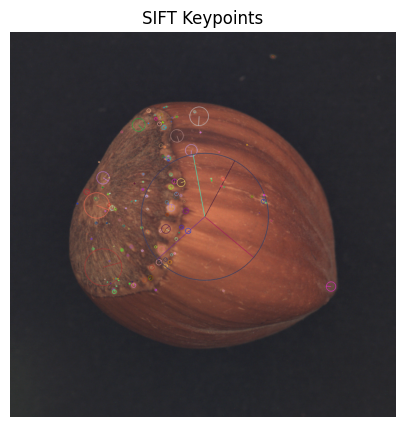

In [8]:
#SIFT (Scale Invariant Feature Transform)
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/005.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.axis("off")
plt.show()